<h2>TASK</h2>


Ethereum transactions crawler task

Create an application that will allow a user to view transaction data from the Ethereum blockchain associated with a specific wallet address W that the user inputs, starting with block B. The application should get information on:
    <ul>
        <li>wallets (addresses) and amounts of ETH associated with transactions             made to and from the given wallet W </li>
        <li>show them in a simple human-readable way (ideally, through a web page)         </li>
    </ul>
The application should collect and display ALL transaction data starting from the given block B. 

<h4>Example:</h4> 

If a user requests to view transactions associated with the address **0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f** from block **9000000** to the current block, your application should be able to crawl and visualize all transaction data (addresses that have sent and received tokens from the address 0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f, and how much ETH was used for a given transaction) in that period of time.

<h3>For bonus points:</h3>
    <ul>
    <li>Given a date in YYYY-MM-DD format, the program should return the exact value of ETH that was available on the given address at YYYY-MM-DD 00:00 UTC time.
    </li>
    <li>Do the same task above to include tokens amounts (other than ETH) </li>
    </ul>
    
<h3>Instructions </h3>
    <ul>
    <li>Use any technology you would like/are familiar with (language, database)</li>
    <li>Please include instructions on how to run the project together with the code (so our team members can run it in one of our environments)</li>
    <li>A list of officially available ethereum clients can be found here: http://ethdocs.org/en/latest/connecting-to-clients/. Other implementations can be found on the web. Additionally, you can utilize an API from a service such as https://etherscan.io/apis or register an account on infura.io service to access data from the blockchain directly.</li>
    </ul>
See https://etherscan.io/ for an example of how data can be visualized.

Please, put your resolution to the private github repository and share it with marijakrivosic, branarakic & kotlarmilos.

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import json
from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import display, HTML

In [2]:
#ADDRESS = '0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f'
API_KEY = "29KKAKAHK7B9BY6SMHV41WKQTJ23D1V14D"
URL = "https://api.etherscan.io/api"
PARAMS_ETH = {'module': 'account',
          'address': ' ',
          'action': 'txlist',
          'apikey': API_KEY}


In [3]:
current_block = requests.get(url = 'https://api.blockcypher.com/v1/eth/main')
current_block = current_block.json()['height']

In [4]:
starting_block = -1
while starting_block not in range(0, current_block+1):
    starting_block = int(input("Please enter a starting block:"))
PARAMS_ETH['startingblock'] = starting_block

response_status = requests.get(url=URL, params= PARAMS_ETH).json()['status']
while (int(response_status) != 1):
    address = input("Please enter a valid address:")
    PARAMS_ETH['address'] = address
    response_status = requests.get(url=URL, params= PARAMS_ETH).json()['status']

Please enter a starting block:0
Please enter a valid address:0xaa7a9ca87d3694b5755f213b5d04094
0
Please enter a valid address:aaaaaaaaaaaa
0
Please enter a valid address:0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f
1


In [5]:
PARAMS_ETH_INTERNAL = PARAMS_ETH.copy()
PARAMS_ETH_INTERNAL['action'] = 'txlistinternal'

In [6]:
r  = requests.get(url=URL, params= PARAMS_ETH)
r1 = requests.get(url=URL, params= PARAMS_ETH_INTERNAL)

try:
    df_eth= pd.DataFrame(r.json()['result'])
    df_eth_internal = pd.DataFrame(r1.json()['result'])
except:
    print(r.json()['result'])

In [7]:
print(int(df_eth.iloc[-1]['blockNumber']))

5004018


In [8]:
#making api calls until all transaction are pulled
last_block = int(df_eth.iloc[-1]['blockNumber'])
new_last_block = -1

while(last_block < current_block) & (last_block != new_last_block):
    last_block = int(df_eth.iloc[-1]['blockNumber'])
    print(f'last block: {last_block}')
    PARAMS_ETH['startblock'] = last_block + 1
    new_df = requests.get(url=URL, params= PARAMS_ETH)
    new_df = pd.DataFrame(new_df.json()['result'])
    if(new_df.empty):
        break
    new_last_block = int(new_df.iloc[-1]['blockNumber'])
    df_eth = pd.concat([df_eth, new_df])

last block: 5004018
last block: 5220834
last block: 5591309
last block: 6420615
last block: 7340119
last block: 9363313
last block: 10632097
last block: 11219547
last block: 11680986
last block: 11966497
last block: 12383419
last block: 13453906
last block: 13545227
last block: 13750904
last block: 14562883
last block: 14794988


In [9]:
if(not(df_eth_internal.empty)):
    last_block = int(df_eth_internal.iloc[-1]['blockNumber'])
new_last_block = -1

while(last_block < current_block) & (last_block != new_last_block) & (not(df_eth_internal.empty)):
    last_block = int(df_eth_internal.iloc[-1]['blockNumber'])
    print(f'last block: {last_block}')
    PARAMS_ETH_INTERNAL['startblock'] = last_block + 1
    new_df = requests.get(url=URL, params= PARAMS_ETH_INTERNAL)
    new_df = pd.DataFrame(new_df.json()['result'])
    if(new_df.empty):
        break
    new_last_block = int(new_df.iloc[-1]['blockNumber'])
    df_eth_internal = pd.concat([df_eth_internal, new_df])

In [10]:
df_eth = pd.concat([df_eth, df_eth_internal])

In [11]:
print(f'number of eth transactions: {df_eth.shape[0]}')

number of eth transactions: 152833


In [12]:
#converting wei to eth values
df_eth['value'] = (df_eth['value'].astype(float)) / (10**18)
df_eth['gasPrice'] = (df_eth['gasPrice'].astype(float)) / (10**18)
df_eth['gasCost'] = df_eth['gasPrice'].astype(float) * df_eth['gasUsed'].astype(float)
df_eth.head()


,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,gasCost
0,4961540,1516760378,0xfc3ca47c82e84519592a955fe0c89ea319ad3611bf62...,445,0xc63eb5aa0aba3ef06850a1fd864c3526446b5bd361b5...,2,0xe80d171dbe7898ef93d0b2be621d2978921c471a,,0.0,3950000,6.000000e-08,0,1,0x60606040526000600360146101000a81548160ff0219...,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,3818286,3645181,9833457,0.218711
1,4961546,1516760423,0x05728253d148fc2c1c89e316c091785603613c484559...,447,0xdc2493a1c3c4a8e4201e9b96b81ce99c372b52ed5219...,11,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,2080664,1656258,9833451,0.099375
2,4961549,1516760442,0xb046816d5096dd363fff1cf18906f4eafb87c40713e1...,448,0x5bab6c9526ff4a03d363fff613d74cb71a9f52c36600...,7,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,1829954,1640298,9833448,0.098418
3,4961553,1516760471,0xcb73c23d0be82febaf9b2c454abe3eb46184618c9e41...,449,0xb8e971baedde506197c3e2e920dd9cb514728a9bb197...,2,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,1813275,1640170,9833444,0.098410
4,4961555,1516760518,0x676c2a7c01742415150da1cefa3aecb807614f35bdb1...,450,0x07658179a23d65904538d9f647bdc699e82b08fb0e8b...,10,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,2088895,1639914,9833442,0.098395


In [13]:
#display(HTML(df_eth.to_html()))

In [14]:
#converting unix timestamp to YYYY-MM-DD hh:mm:ss 
df_eth['timeStamp'] = pd.to_datetime(df_eth['timeStamp'], unit='s')

In [15]:
#transforming timestamp feature to 3 separate features; year, month, day
df_eth['year'] = pd.DatetimeIndex(df_eth['timeStamp']).year
df_eth['month'] = pd.DatetimeIndex(df_eth['timeStamp']).month
df_eth['day'] = pd.DatetimeIndex(df_eth['timeStamp']).day

In [16]:
plt.figure(figsize = (20,10))
#erc20_trx_by_month = df_erc20_tokens['month'].value_counts().sort_index
eth_trx_by_month = df_eth.groupby('year').month.value_counts().unstack()
eth_trx_by_month = eth_trx_by_month.fillna(0)

<Figure size 1440x720 with 0 Axes>

Text(0.5, 249.0, 'Number of ETH transactions per year')

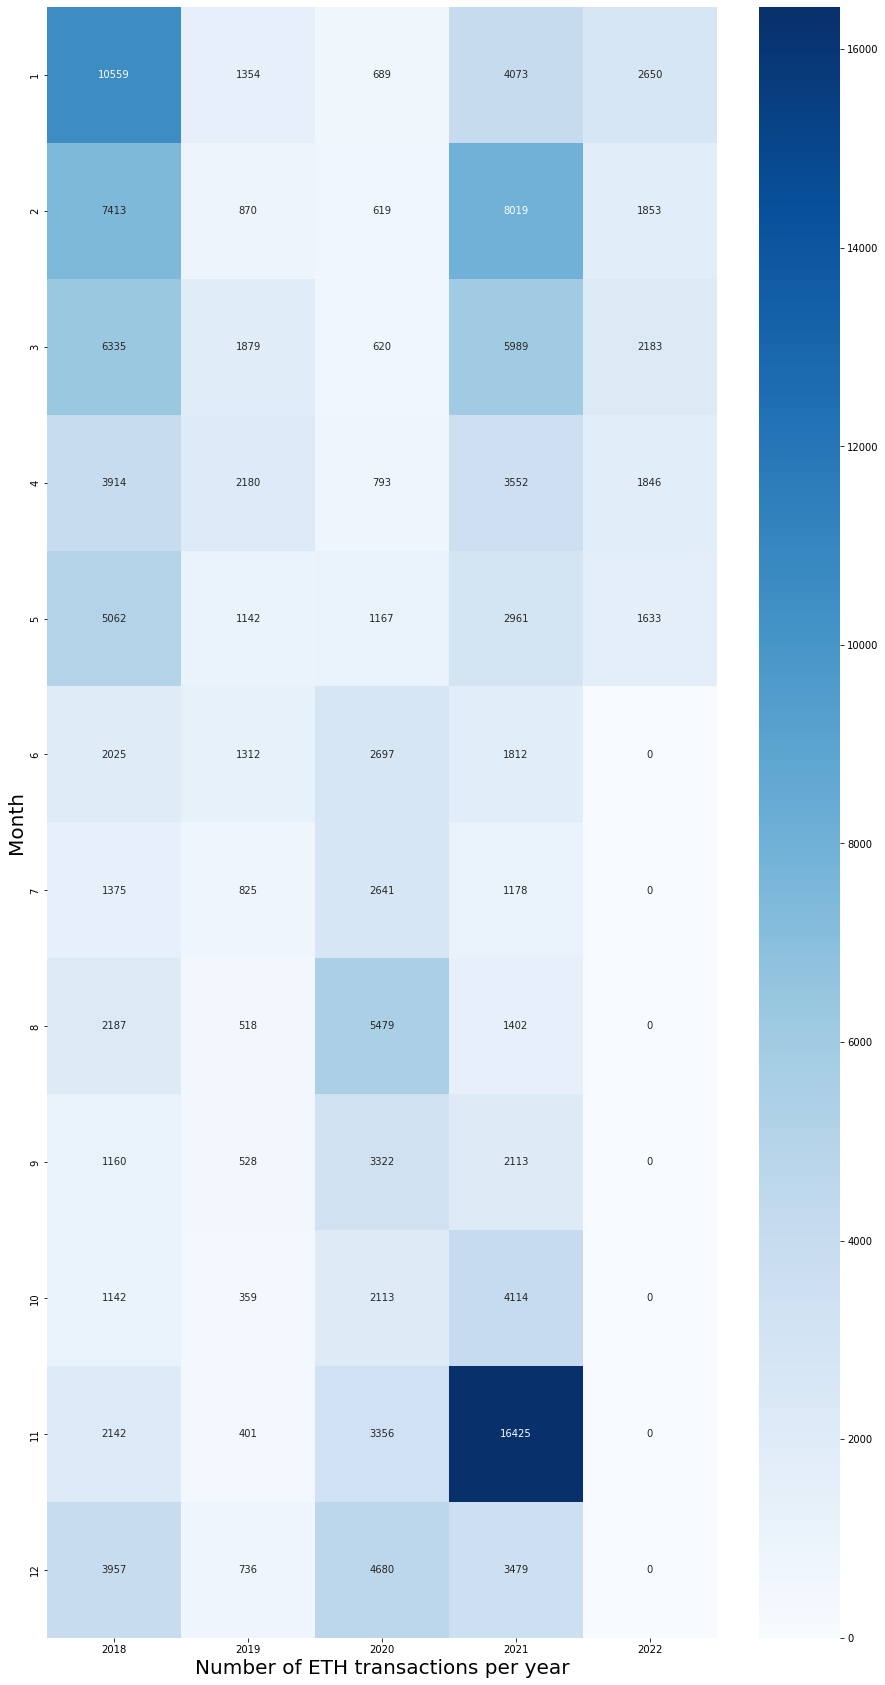

In [17]:
plt.figure(figsize= (15,30))
heatmap = sb.heatmap(eth_trx_by_month.T, annot = True, fmt=".0f", cmap = 'Blues')
plt.ylabel("Month", fontsize = 20)
plt.xlabel("Number of ETH transactions per year", fontsize = 20)

__--------------------------------------------------------------------------------------------------------__

<h1> Bonus points task </h1>

__--------------------------------------------------------------------------------------------------------__

In [18]:
current_block = requests.get(url = 'https://api.blockcypher.com/v1/eth/main')
current_block = current_block.json()['height']

PARAMS_ETH['startblock'] = 0
PARAMS_ERC20 = PARAMS_ETH.copy()
PARAMS_ERC20['action'] = 'tokentx'

PARAMS_ETH_INTERNAL = PARAMS_ETH.copy()
PARAMS_ETH_INTERNAL['action'] = 'txlistinternal'

In [19]:
r  = requests.get(url=URL, params= PARAMS_ETH)
r1 = requests.get(url=URL, params= PARAMS_ERC20)
r3 = requests.get(url=URL, params= PARAMS_ETH_INTERNAL)

try:
    df_eth= pd.DataFrame(r.json()['result'])
    df_erc20_tokens = pd.DataFrame(r1.json()['result'])
    df_eth_internal = pd.DataFrame(r3.json()['result'])
except:
    print(r.json()['result'])

In [20]:
while(True):
    user_datetime = input("Please enter a valid date:").strip()
    try:
        datetime.strptime(user_datetime, '%Y-%m-%d')
        break
    except ValueError:
        print("Date format should look like this: YYYY-MM-DD")
user_datetime += " 00:00"

Please enter a valid date:2022-05-25


In [21]:
#making api calls until all transaction are pulled
latest_datetime = pd.to_datetime(df_eth.iloc[-1]['timeStamp'], unit='s')

while (latest_datetime < pd.Timestamp(user_datetime)):
    latest_datetime = pd.to_datetime(df_eth.iloc[-1]['timeStamp'], unit='s')
    print(f'latest datetime: {latest_datetime}')
    PARAMS_ETH['startblock'] = int(df_eth.iloc[-1]['blockNumber']) + 1
    new_df = requests.get(url=URL, params= PARAMS_ETH)
    new_df = pd.DataFrame(new_df.json()['result'])
    if(new_df.empty):
        break
    latest_datetime = pd.to_datetime(df_eth.iloc[-1]['timeStamp'], unit='s')
    df_eth = pd.concat([df_eth, new_df])

latest datetime: 2018-01-31 06:02:29
latest datetime: 2018-03-08 22:05:39
latest datetime: 2018-05-10 21:02:30
latest datetime: 2018-09-29 10:04:24
latest datetime: 2019-03-10 07:33:48
latest datetime: 2020-01-27 09:53:04
latest datetime: 2020-08-10 12:17:41
latest datetime: 2020-11-08 22:39:16
latest datetime: 2021-01-18 18:53:49
latest datetime: 2021-03-03 16:49:23
latest datetime: 2021-05-06 22:21:44
latest datetime: 2021-10-20 09:47:22
latest datetime: 2021-11-03 17:34:14
latest datetime: 2021-12-06 07:16:40
latest datetime: 2022-04-11 06:49:07
latest datetime: 2022-05-17 21:52:41


In [22]:
if(not(df_eth_internal.empty)):
    latest_datetime = pd.to_datetime(df_eth_internal.iloc[-1]['timeStamp'], unit='s')

while ((latest_datetime < pd.Timestamp(user_datetime)) & (not(df_eth_internal.empty))):
    latest_datetime = pd.to_datetime(df_eth_internal.iloc[-1]['timeStamp'], unit='s')
    print(f'latest datetime: {latest_datetime}')
    PARAMS_ETH_INTERNAL['startblock'] = int(df_eth_internal.iloc[-1]['blockNumber']) + 1
    new_df = requests.get(url=URL, params= PARAMS_ETH_INTERNAL)
    new_df = pd.DataFrame(new_df.json()['result'])
    if(new_df.empty):
        break
    latest_datetime = pd.to_datetime(df_eth_internal.iloc[-1]['timeStamp'], unit='s')
    df_eth_internal = pd.concat([df_eth_internal, new_df])

In [23]:
#making api calls until all transaction are pulled
latest_datetime = pd.to_datetime(df_erc20_tokens.iloc[-1]['timeStamp'], unit='s')

while (latest_datetime < pd.Timestamp(user_datetime)):
    latest_datetime = pd.to_datetime(df_erc20_tokens.iloc[-1]['timeStamp'], unit='s')
    print(f'latest datetime: {latest_datetime}')
    PARAMS_ERC20['startblock'] = int(df_erc20_tokens.iloc[-1]['blockNumber']) + 1
    new_df = requests.get(url=URL, params= PARAMS_ERC20)
    new_df = pd.DataFrame(new_df.json()['result'])
    if(new_df.empty):
        break
    latest_datetime = pd.to_datetime(df_erc20_tokens.iloc[-1]['timeStamp'], unit='s')
    df_erc20_tokens = pd.concat([df_erc20_tokens, new_df])

latest datetime: 2022-04-02 18:54:36


In [24]:
df_eth = pd.concat([df_eth, df_eth_internal])

In [25]:
#converting unix timestamp to YYYY-MM-DD hh:mm:ss 
df_eth['timeStamp'] = pd.to_datetime(df_eth['timeStamp'], unit='s')
df_erc20_tokens['timeStamp'] = pd.to_datetime(df_erc20_tokens['timeStamp'], unit='s')

In [26]:
df_eth = df_eth[df_eth['timeStamp'] <= user_datetime]
df_erc20_tokens = df_erc20_tokens[df_erc20_tokens['timeStamp'] <= user_datetime]

In [27]:
print(f'number of eth transactions: {df_eth.shape[0]}')
print(f'number of ERC20 token transfer events: {df_erc20_tokens.shape[0]}')
print(f'number of ERC20 tokens transfered: {len(df_erc20_tokens["tokenName"].unique())}')

number of eth transactions: 152833
number of ERC20 token transfer events: 86
number of ERC20 tokens transfered: 31


In [28]:
#converting wei to eth values
df_eth['value'] = (df_eth['value'].astype(float)) / (10**18)
df_eth['gasPrice'] = (df_eth['gasPrice'].astype(float)) / (10**18)
df_eth['gasCost'] = df_eth['gasPrice'].astype(float) * df_eth['gasUsed'].astype(float)
df_eth.head()

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,gasCost
0,4961540,2018-01-24 02:19:38,0xfc3ca47c82e84519592a955fe0c89ea319ad3611bf62...,445,0xc63eb5aa0aba3ef06850a1fd864c3526446b5bd361b5...,2,0xe80d171dbe7898ef93d0b2be621d2978921c471a,,0.0,3950000,6.000000e-08,0,1,0x60606040526000600360146101000a81548160ff0219...,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,3818286,3645181,9833465,0.218711
1,4961546,2018-01-24 02:20:23,0x05728253d148fc2c1c89e316c091785603613c484559...,447,0xdc2493a1c3c4a8e4201e9b96b81ce99c372b52ed5219...,11,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,2080664,1656258,9833459,0.099375
2,4961549,2018-01-24 02:20:42,0xb046816d5096dd363fff1cf18906f4eafb87c40713e1...,448,0x5bab6c9526ff4a03d363fff613d74cb71a9f52c36600...,7,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,1829954,1640298,9833456,0.098418
3,4961553,2018-01-24 02:21:11,0xcb73c23d0be82febaf9b2c454abe3eb46184618c9e41...,449,0xb8e971baedde506197c3e2e920dd9cb514728a9bb197...,2,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,1813275,1640170,9833452,0.098410
4,4961555,2018-01-24 02:21:58,0x676c2a7c01742415150da1cefa3aecb807614f35bdb1...,450,0x07658179a23d65904538d9f647bdc699e82b08fb0e8b...,10,0xe80d171dbe7898ef93d0b2be621d2978921c471a,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0.0,3950000,6.000000e-08,0,1,0x4029a3ce000000000000000000000000000000000000...,,2088895,1639914,9833450,0.098395


In [29]:
#converting wei to token values
df_erc20_tokens['value'] = (df_erc20_tokens['value'].astype(float)) / (10**df_erc20_tokens['tokenDecimal'].astype(int))
df_erc20_tokens['gasPrice'] = (df_erc20_tokens['gasPrice'].astype(float)) / (10**df_erc20_tokens['tokenDecimal'].astype(int))
df_erc20_tokens['gasCost'] = df_erc20_tokens['gasPrice'].astype(float) * df_erc20_tokens['gasUsed'].astype(int)
df_erc20_tokens.head()

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations,gasCost
0,4961623,2018-01-24 02:34:07,0x5e4058d5ce642bd393126c414b3dfa9dcb3ee8b80e8a...,471,0xd1e7a66e59aafb4c4ba055989a08735c80b247cb6c1b...,0x0000000000000000000000000000000000000000,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,7.499039e+07,Trace,TRAC,18,28,3950000,6.000000e-08,145459,1030071,deprecated,9833382,0.008728
1,4961623,2018-01-24 02:34:07,0x5e4058d5ce642bd393126c414b3dfa9dcb3ee8b80e8a...,471,0xd1e7a66e59aafb4c4ba055989a08735c80b247cb6c1b...,0x0000000000000000000000000000000000000000,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,3.200000e+07,Trace,TRAC,18,28,3950000,6.000000e-08,145459,1030071,deprecated,9833382,0.008728
2,4970221,2018-01-25 13:31:02,0x5ed076ede6b00a31e0d21bf97ce32dcbf8d9554ffbb7...,16,0x83b316b3c97c69a93f59a0a30567ee258ba41ede037f...,0x8f714c30c44fa949ad89970d3c5d34dc960efe43,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,1.500000e+03,Trace,TRAC,18,296,56352,2.100000e-08,22568,7930071,deprecated,9824784,0.000474
3,4970491,2018-01-25 14:33:50,0x5d1a41de495b4eecc305859b1020ccff05cd84e08bca...,37,0x2e11cfac5bb052be8df67555c79806aefd36587aad9e...,0x001a08b8b5c4e41fba84f963feee4a6d15528b3e,0x4270bb238f6dd8b1c3ca01f96ca65b2647c06d3c,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,8.330000e+02,FOTA,FOTA,18,92,81112,1.100000e-08,54075,5794582,deprecated,9824514,0.000595
4,5013625,2018-02-01 21:36:13,0xb35daa3c137be3907a630c45e23d3c3fb6db45ae306e...,12,0x28a39fe7366fb2c707d2fe3c2bae1cd7a226939ebb32...,0xe22569871d0181874d39fe2e8d1494d106c677b4,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,0xaa7a9ca87d3694b5755f213b5d04094b8d0f0a6f,5.000000e+02,Trace,TRAC,18,191,37568,4.100000e-08,37568,7828217,deprecated,9781380,0.001540


In [30]:
def historical_balance(dataframe):
    balance = 0
    results = dataframe[(dataframe['isError'].astype(int) == 0) & (dataframe['txreceipt_status'] != str(0))]
    results_from = results[(results['from'] == ADDRESS.lower())]
    results_to = results[(results['to'] == ADDRESS.lower())]
    print(results_to['value'].sum(), results_from['value'].sum() )
    balance = results_to['value'].sum() - results_from['value'].sum() - results_from['gasCost'].sum()
    return balance

In [31]:
print(f'ETH available at {user_datetime} -> {historical_balance(df_eth)}')

0.0 0.0
ETH available at 2022-05-25 00:00 -> 0.0


In [32]:
def historical_balance_erc(dataframe):
    results = dataframe
    results_from = results[results['from'] == ADDRESS.lower()]
    going_out = results_from.groupby('tokenName')['value'].sum()
    going_out_fee = results_from.groupby('tokenName')['gasCost'].sum()
    
    results_to = results[(results['to'] == ADDRESS.lower())]
    going_in = results_to.groupby('tokenName')['value'].sum()
    balance =  going_in - going_out - going_out_fee
    going_out_final = (going_out + going_out_fee) * (-1)
    going_in = pd.concat([going_in, going_out_final])
    return going_in.groupby(level=0).sum()

In [33]:
tknName = 'Trace'
print(f'{tknName} available at {user_datetime} -> {historical_balance_erc(df_erc20_tokens)[tknName]}')

Trace available at 2022-05-25 00:00 -> 295116.9835987687


In [34]:
#transforming timestamp feature to 3 separate features; year, month, day
df_eth['year'] = pd.DatetimeIndex(df_eth['timeStamp']).year
df_eth['month'] = pd.DatetimeIndex(df_eth['timeStamp']).month
df_eth['day'] = pd.DatetimeIndex(df_eth['timeStamp']).day

df_erc20_tokens['year'] = pd.DatetimeIndex(df_erc20_tokens['timeStamp']).year
df_erc20_tokens['month'] = pd.DatetimeIndex(df_erc20_tokens['timeStamp']).month
df_erc20_tokens['day'] = pd.DatetimeIndex(df_erc20_tokens['timeStamp']).day

/home/micax/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.draw()
/home/micax/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 20339 (\N{CJK UNIFIED IDEOGRAPH-4F73}) missing from current font.
  fig.canvas.draw()
/home/micax/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.draw()
/home/micax/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from current font.
  fig.canvas.draw()
/home/micax/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.canvas.draw()
/home/micax/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 24065 (\N{CJK UNIFIED IDEOGRAPH-5E01}) missing f

Text(0.5, 249.0, 'Number of ERC20 token transactions per year')

/home/micax/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/micax/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20339 (\N{CJK UNIFIED IDEOGRAPH-4F73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/micax/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/micax/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/micax/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.canvas

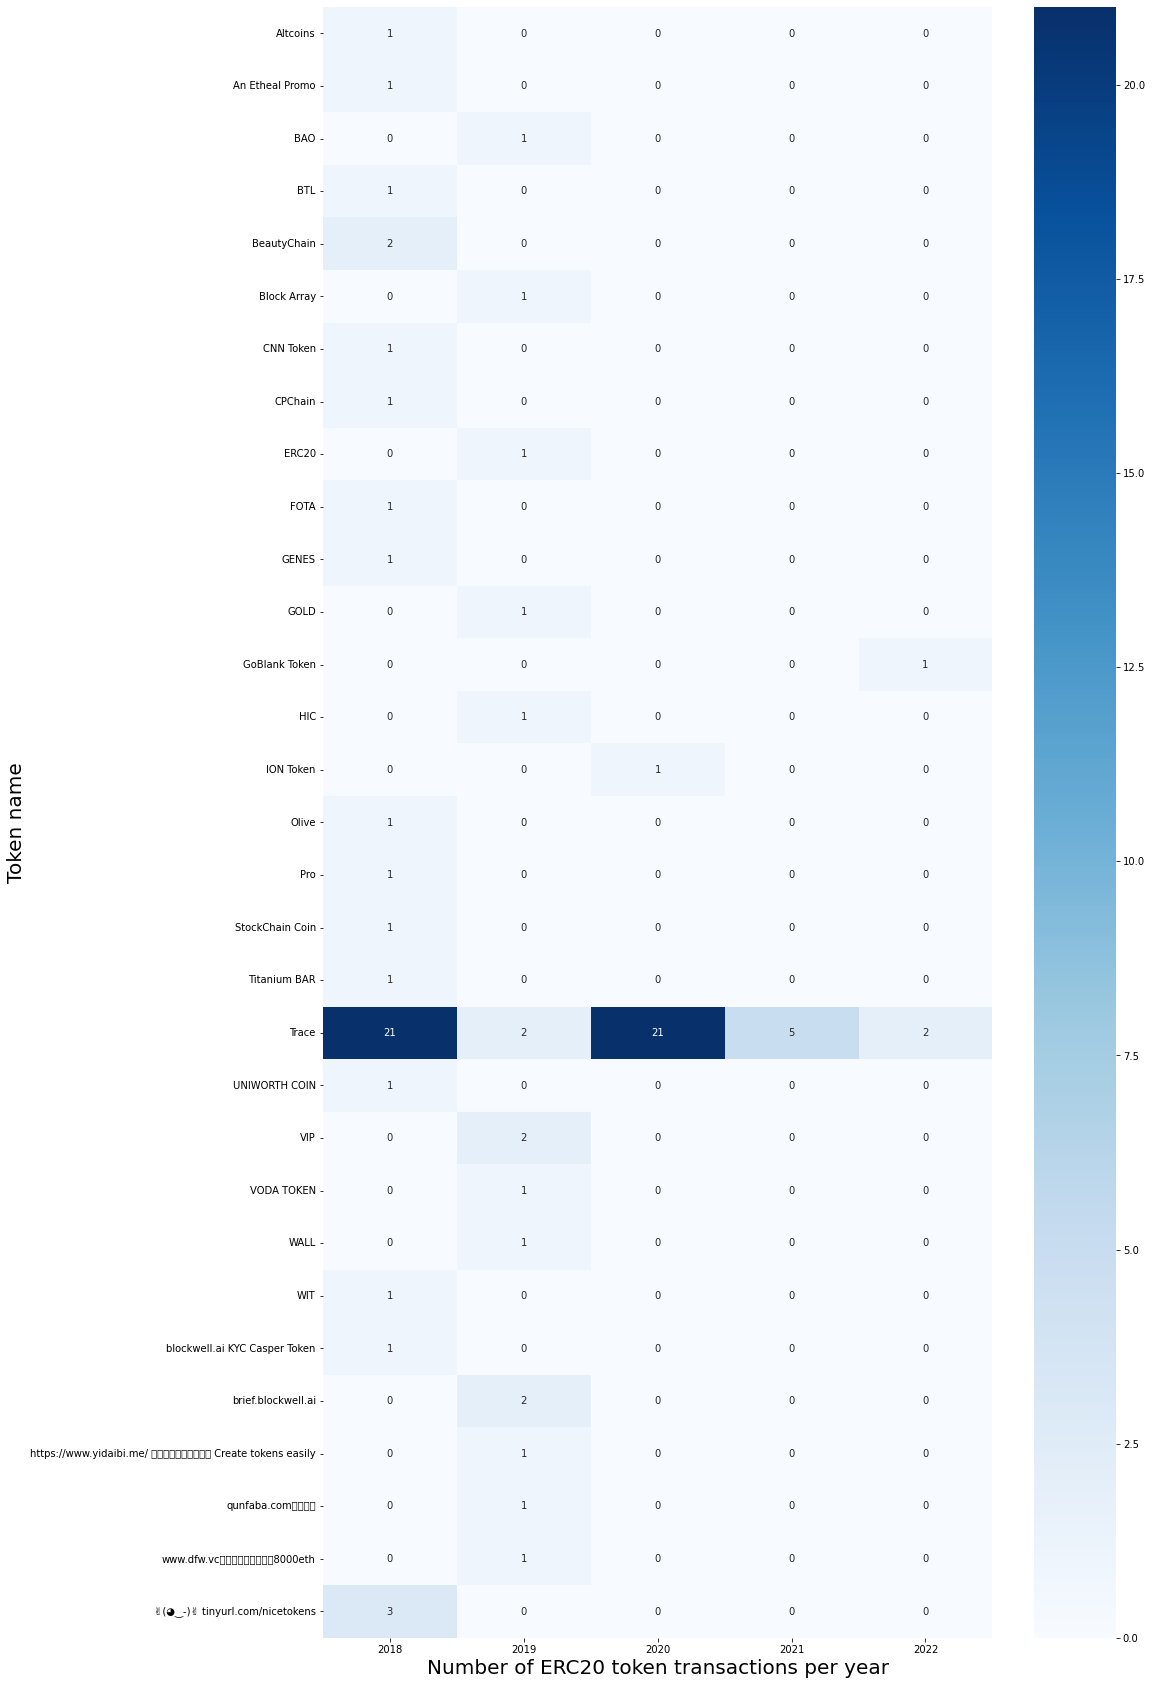

In [35]:
erc20_trx_by_month = df_erc20_tokens.groupby('year').tokenName.value_counts().unstack()
erc20_trx_by_month = erc20_trx_by_month.fillna(0)

plt.figure(figsize= (15,30))
heatmap = sb.heatmap(erc20_trx_by_month.T, annot = True, fmt=".0f", cmap = 'Blues')
plt.ylabel("Token name", fontsize = 20)
plt.xlabel("Number of ERC20 token transactions per year", fontsize = 20)


Text(0.5, 249.0, 'Number of ETH transactions per year')

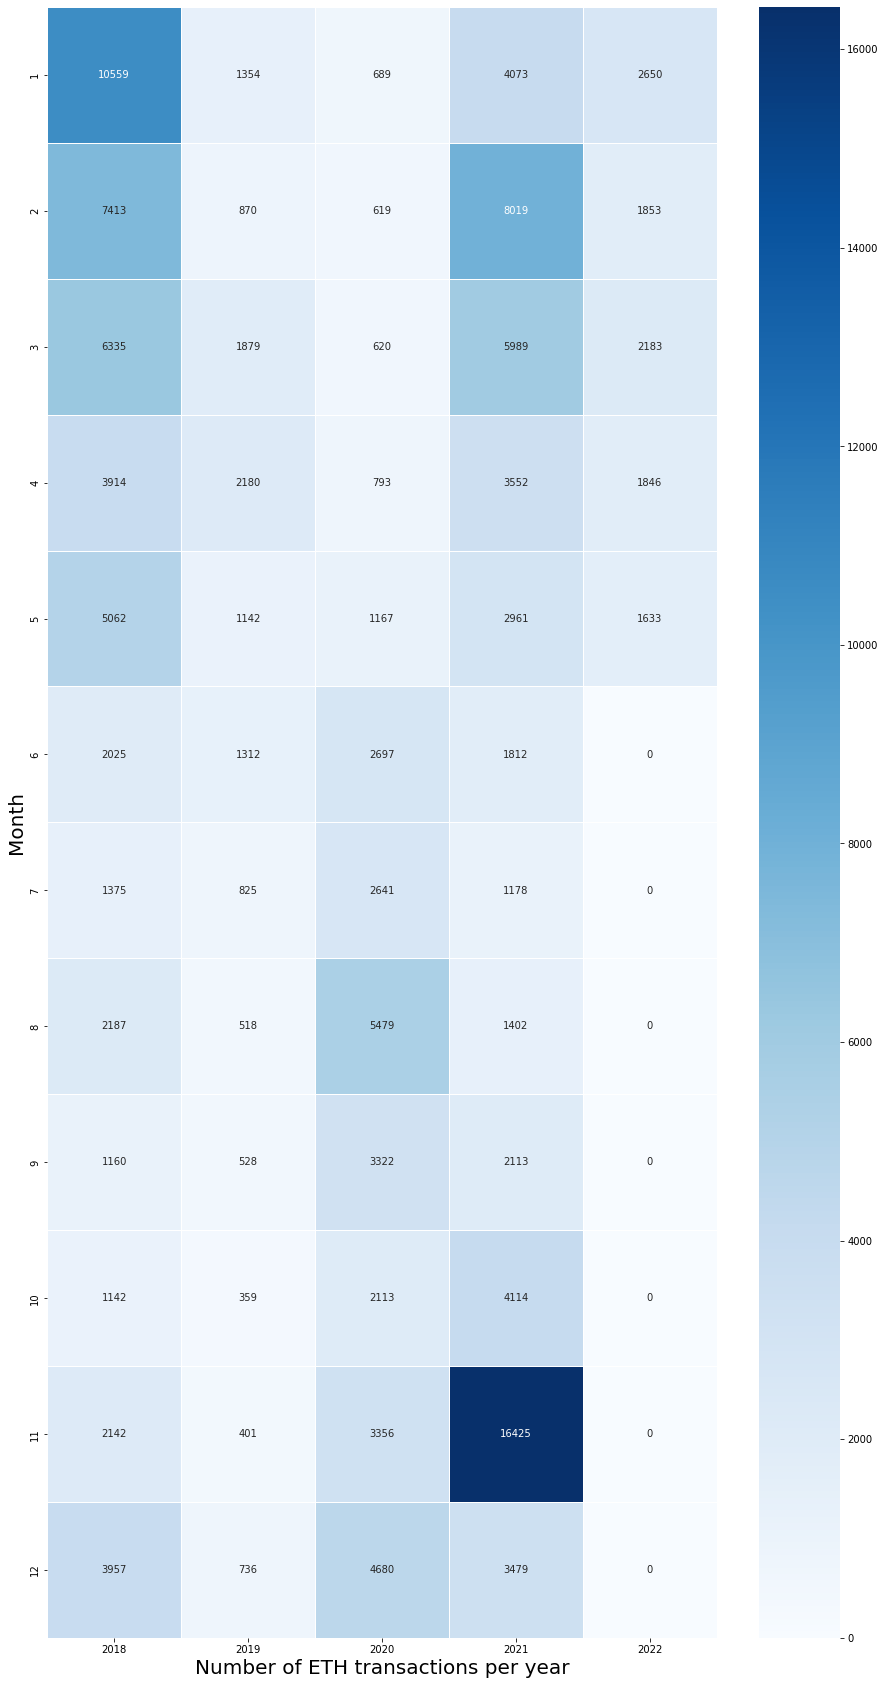

In [36]:
eth_trx_by_month = df_eth.groupby('year').month.value_counts().unstack()
eth_trx_by_month = eth_trx_by_month.fillna(0)

plt.figure(figsize= (15,30))
heatmap = sb.heatmap(eth_trx_by_month.T, annot = True, fmt=".0f", cmap = 'Blues', linewidth=1)
plt.ylabel("Month", fontsize = 20)
plt.xlabel("Number of ETH transactions per year", fontsize = 20)